

### Introduction to Computer Vision (Fall 2022)
Instructor: Muhammad Fahim \\
TA: Batul Yaseen, Karam Almaghout


### Acknowledgement
This lab was maintained by Rauf, Marcus, Rufina, Alex, Batul, Karam and Fahim \\



## Lab Objectives
Hough Transform

In [14]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
# remove grid lines
import numpy as np
import time, cv2, math
from typing import AnyStr, Any, Callable

In [15]:
# function to read and resize an image
def read_and_resize(filename: str, grayscale: bool = False, fx: float = 1.0, fy: float = 1.0):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    if fx != 1.0 and fy != 1.0:
      img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result

    
def show_in_row(list_of_images: list, titles: list = None, disable_ticks: bool = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

### **HoughLines** 

**cv2.HoughLines(**) 

returns an array of (rho, theta) values. rho is measured in pixels and theta is measured in radians. 

First parameter, Input image should be a binary image (so apply threshold or use canny edge detection before finding applying hough transform).

Second and third parameters are rho and theta accuracies respectively.

Fourth argument is the threshold, which means minimum vote it should get for it to be considered as a line.

cv2.HoughLines(edges,1,np.pi/180,200)


------------------------------------------------

**cv2.HoughLinesP()**

is an optimization of Hough Transform

returns the two endpoints of lines

lines = cv2.HoughLinesP(E,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 50)

In [16]:
!wget "https://www.dropbox.com/s/vte15iohli93z5j/road.jpg?dl=0" -O road.jpg

--2022-11-07 14:44:49--  https://www.dropbox.com/s/vte15iohli93z5j/road.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/vte15iohli93z5j/road.jpg [following]
--2022-11-07 14:44:49--  https://www.dropbox.com/s/raw/vte15iohli93z5j/road.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc354579fd26ca9581bf13c7960a.dl.dropboxusercontent.com/cd/0/inline/BwQlgsoT_laBCRlwKO0ftW1TfV8nIjFgnj8d6MJMiKv43LNrDZQxLuFPTQn-NJoErZKFsoXXW89RvIaUOtKWMvb_V-u1u_j1SeZyG4Wkn1tnDAxCcw4TW90PgWr-YBCYhcretLwnx6YXlyYsqT-_j1pX-SukmEMpa_gG4WMZ_V2epQ/file# [following]
--2022-11-07 14:44:49--  https://uc354579fd26ca9581bf13c7960a.dl.dropboxusercontent.com/cd/0/inline/BwQlgsoT_laBCRlwKO0ftW1TfV8nIjFgnj8d6MJMiKv43LNrDZQxLuFPTQn-NJoErZKFsoXXW89RvIaUOtKWMvb

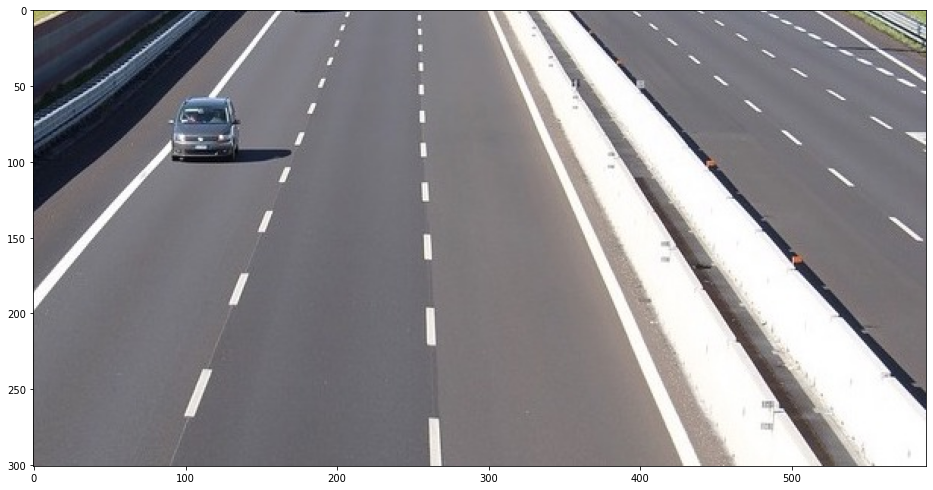

In [17]:
img = read_and_resize("road.jpg")
show_in_row([img])

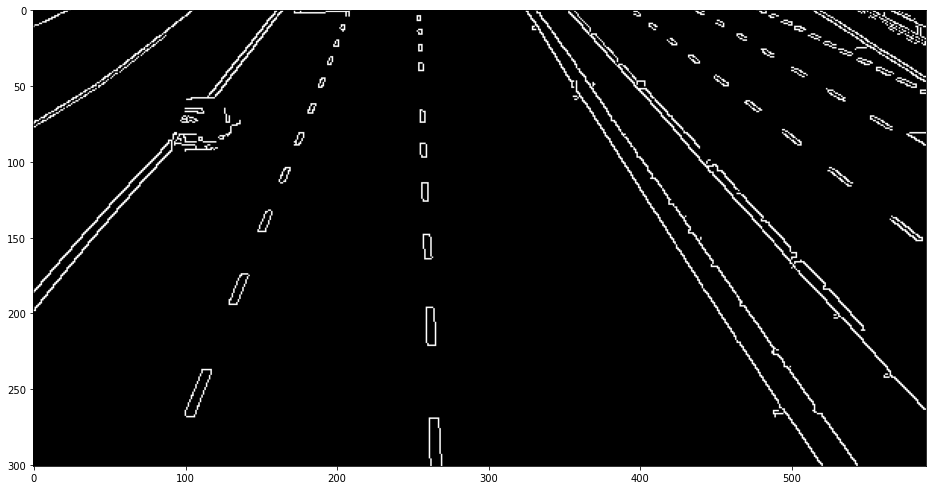

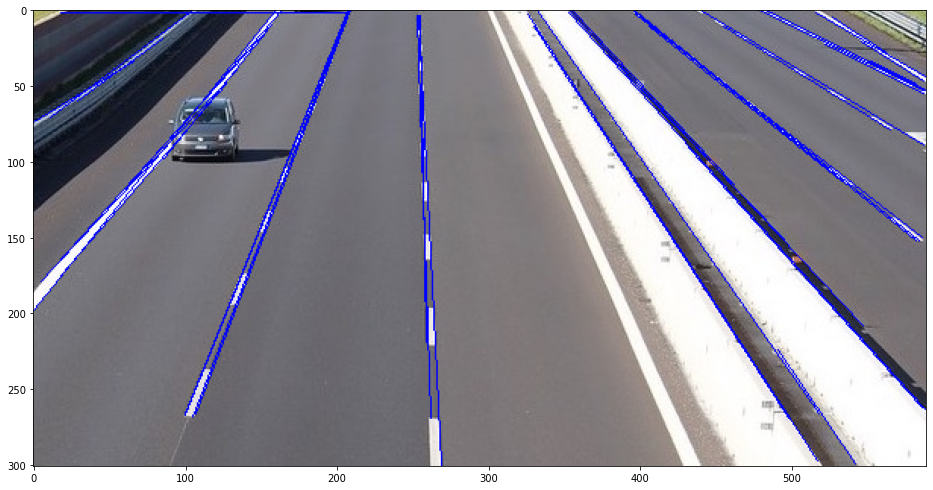

In [18]:
def detectLines(max_slider):
  global img
  global dst
  global gray

  dst = np.copy(img)
  
  th1 = 700 
  th2 = 200
  edges = cv2.Canny(img, th1, th2)
  show_in_row([edges])
	# Apply probabilistic hough line transform
  lines = cv2.HoughLinesP(edges, 2, np.pi/180.0, 50, minLineLength=10, maxLineGap=100)
  # show_in_row([dst])  
	# Draw lines on the detected points
  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(dst, (x1, y1), (x2, y2), (0,0,255), 1) 



# Create a copy for later usage
dst = np.copy(img)

# Convert image to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Initialize threshold value
initThresh = 500

# Maximum threshold value
maxThresh = 1000

# cv2.createTrackbar("threshold", "Result Image", initThresh, maxThresh, onTrackbarChange)
detectLines(initThresh)
show_in_row([dst])

### **HoughCircles** 

The function HoughCircles is used in OpenCV to detect the circles in an image. It takes the following parameters:
  
  image: The input image.

  method: Detection method, The available methods are HOUGH_GRADIENT and HOUGH_GRADIENT_ALT. 

  dp: the Inverse ratio of accumulator resolution and image resolution.

  mindst: minimum distance between centers od detected circles.

  param_1 and param_2: These are method specific parameters.

  min_Radius: minimum radius of the circle to be detected.

  max_Radius: maximum radius to be detected. 

https://docs.opencv.org/4.5.1/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d

HoughCircles function has **inbuilt** canny detection, therefore it is not required to detect edges explicitly in it.

In [19]:
!wget "https://www.dropbox.com/s/tvqy4aq9ts9po04/eyes.jpg?dl=0" -O eyes.jpg

--2022-11-07 14:44:51--  https://www.dropbox.com/s/tvqy4aq9ts9po04/eyes.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/tvqy4aq9ts9po04/eyes.jpg [following]
--2022-11-07 14:44:51--  https://www.dropbox.com/s/raw/tvqy4aq9ts9po04/eyes.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3353d6083093214f4aef0163e6.dl.dropboxusercontent.com/cd/0/inline/BwR1APwxyskqaOD641d1Y31PgpLBKAtFXBu30kjnrfHH89RtMsp0sYcuCb_4ZrIkv3Xqt8vFpI2QttSFpK5FaCMTn1jTqVxDpAWS_7P5yk5_4mtK5prsaL9NX87LpHkXWgTcXC2x9Y2IoUvm_uW-PgQsVWY_f1LsmL1zFevqwg3Trg/file# [following]
--2022-11-07 14:44:51--  https://uc3353d6083093214f4aef0163e6.dl.dropboxusercontent.com/cd/0/inline/BwR1APwxyskqaOD641d1Y31PgpLBKAtFXBu30kjnrfHH89RtMsp0sYcuCb_4ZrIkv3Xqt8vFpI2QttSFpK5FaCM

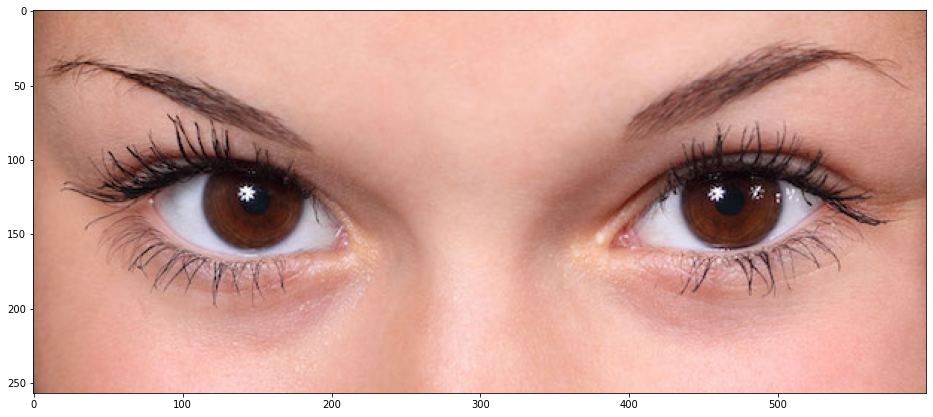

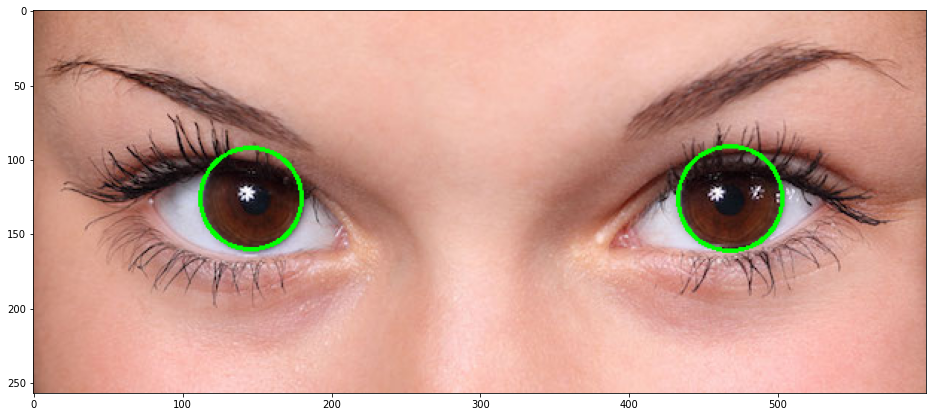

In [20]:
def detectCircle(max_slider):
    cimg = np.copy(img)

    p1 = max_slider
    p2 = max_slider * 0.4

    # Detect circles using HoughCircles transform
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, cimg.shape[0]/64, param1=p1, param2=p2, minRadius=25, maxRadius=50)

    # If at least 1 circle is detected
    if circles is not None:
        cir_len = circles.shape[1] # store length of circles found
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    else:
        cir_len = 0 # no circles detected
    
    # Display output image
    show_in_row([cimg])   

    

    

# Read image
img = cv2.imread('eyes.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
show_in_row([img]) 
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Trackbar will be used for changing threshold for edge 
initThresh = 105 
maxThresh = 200 
detectCircle(initThresh)

### Exercise

In [21]:
!wget "https://www.dropbox.com/s/z40h2aeybcsznln/paper_test.jpg?dl=0" -O paper_test.jpg

--2022-11-07 14:44:53--  https://www.dropbox.com/s/z40h2aeybcsznln/paper_test.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/z40h2aeybcsznln/paper_test.jpg [following]
--2022-11-07 14:44:53--  https://www.dropbox.com/s/raw/z40h2aeybcsznln/paper_test.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc45c117ccf6307d87a1811bca21.dl.dropboxusercontent.com/cd/0/inline/BwQ9Ma9VfSFRo1JiHua7Sv4kpslEMEaM7IVbfKnjkElKUVVKznZpiNygeVM6aWjIF5AqEr-6_uNbKC87Cd0o6KDrIpUZiXjjCNZCdrD6axNQykAvYFtz9d6OTZ15hacabQy8q-4aHrgj5ERvskpnCh30LINrXuiF7OrQJcWtn0F3pQ/file# [following]
--2022-11-07 14:44:53--  https://uc45c117ccf6307d87a1811bca21.dl.dropboxusercontent.com/cd/0/inline/BwQ9Ma9VfSFRo1JiHua7Sv4kpslEMEaM7IVbfKnjkElKUVVKznZpiNygeVM6aWjIF5AqE

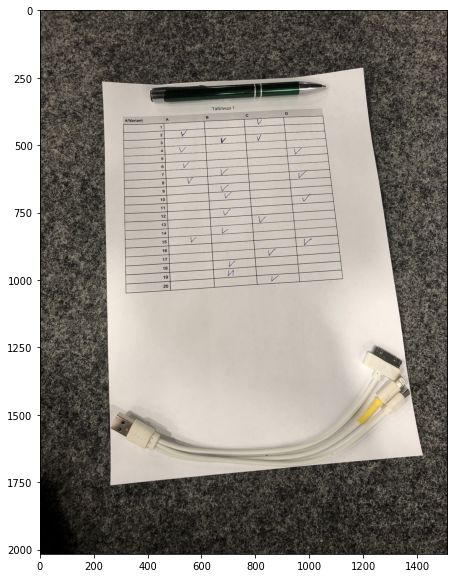

In [22]:
img = read_and_resize("paper_test.jpg")
show_in_row([img])

### Find paper

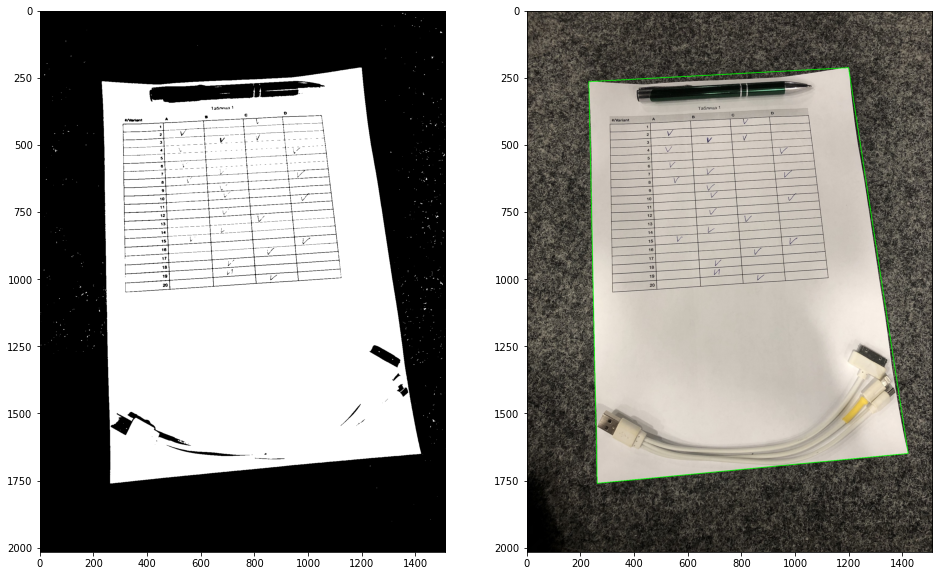

[[ 230  266]
 [1197  214]
 [1419 1649]
 [ 261 1760]]
You are good


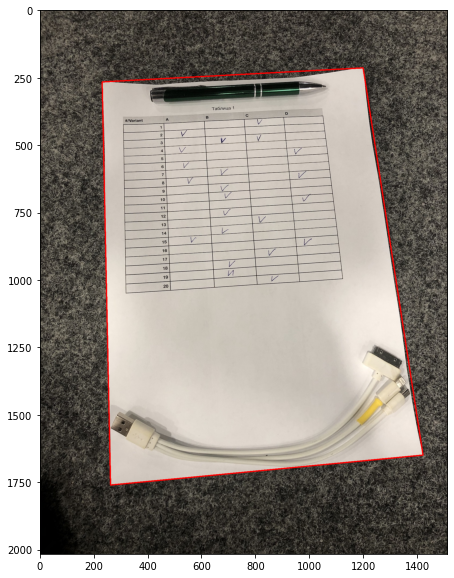

In [23]:
#TODO
# Find the paper's corners

def find_paper_corners(color_img: np.array) -> np.array:
  # return np.array with shape (4, 2)
  # order: [top_left, top_right, bot_right, bot_left]

  gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
  gray_img = cv2.GaussianBlur(gray_img, None, 1.0)
  th, gray_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_OTSU)

  cnts, hierarchy = cv2.findContours(gray_img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]

  paper_contour = None
  for c in cnts:
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c, 0.1 * peri, True)

      if len(approx) == 4:
        paper_contour = approx
        break

  img_copy = color_img.copy()
  if paper_contour is not None:
    cv2.drawContours(img_copy, [paper_contour], -1, (0, 255, 0), 2)

  show_in_row([gray_img, img_copy])
  paper_contour = paper_contour.reshape((4, 2))
  paper_contour = paper_contour[::-1]
  paper_contour[:2], paper_contour[2:] = paper_contour[2:].copy(), paper_contour[:2].copy()
  return paper_contour.reshape((4, 2))

corners = find_paper_corners(img)
print(corners)
if corners.shape == (4, 2):
  print("You are good")
  img_copy = img.copy()
  cv2.polylines(img_copy, [corners], True, (255,0,0), 3)
  show_in_row([img_copy])
else:
  print("Shape must contain the answer to the ultimate question of life")


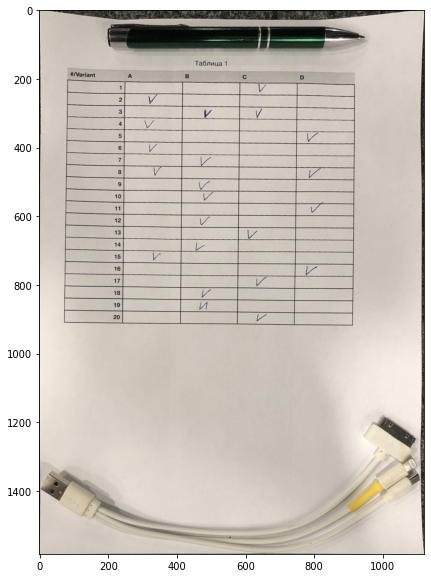

In [24]:
# TODO

def undistort_perspective(img: np.array, corners: np.array) -> np.array:
  dst_size = (1120, 1584)
  dst_points = np.array([[0, 0], [dst_size[0], 0], [dst_size[0], dst_size[1]], [0, dst_size[1]]], np.int32)
  h, status = cv2.findHomography(corners, dst_points)
  return cv2.warpPerspective(img, h, dst_size)

paper = undistort_perspective(img, corners)
show_in_row([paper])

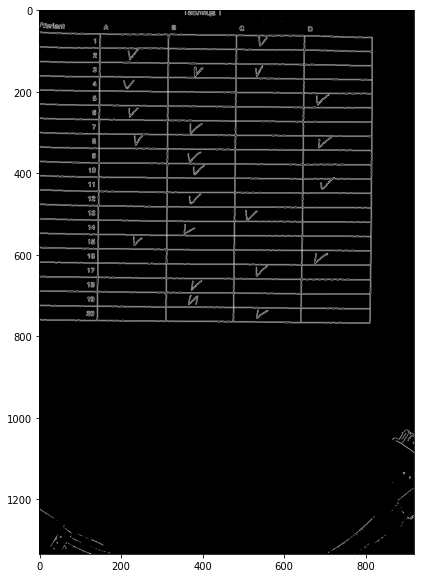

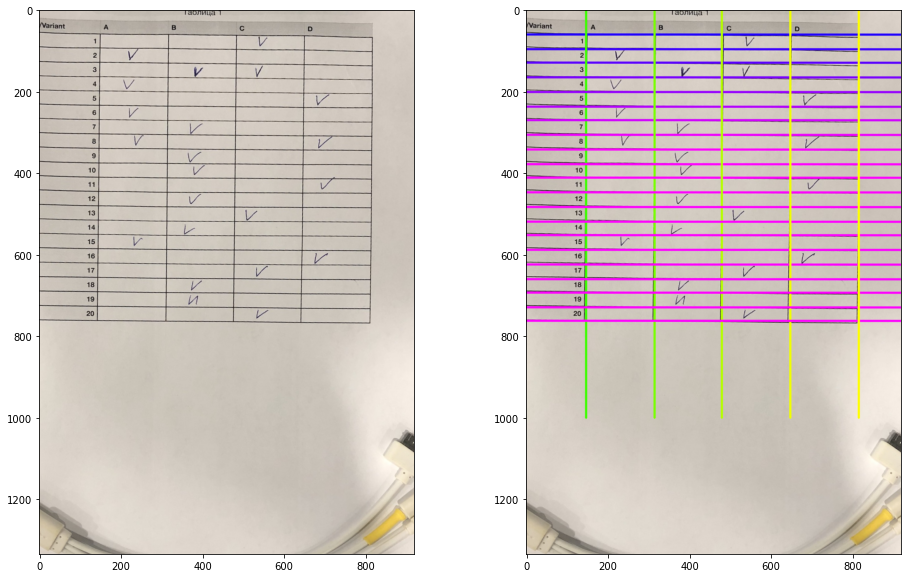

[['C'], ['A'], ['B', 'C'], ['A'], ['D'], ['A'], ['B'], ['A', 'D'], ['B'], ['B'], ['D'], ['B'], ['C'], ['B'], ['A'], ['D'], ['C'], ['B'], ['B'], ['C']]
Seems like you did well!


In [25]:
def find_answers(color_img: np.array) -> list:
  # return in format [[A], [B, C], [], [A], ..]
  gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
  # cv2.Canny()
  dst = cv2.Canny(gray_img, 200, 200, None, 3)
  # _, dst = cv2.threshold(gray_img, 160, 255, cv2.THRESH_BINARY_INV)
  show_in_row([dst])
  
  lines = cv2.HoughLines(dst, 3, np.pi / 90, 500)
  lines = sorted(lines, key=lambda x: x[0][0])
  img_copy = color_img.copy()
  
  i1, i2 = 0, 0
  xs, ys = [], []
  if lines is not None:
    for i in range(len(lines)):
      rho = lines[i][0][0]
      theta = lines[i][0][1]
      a = math.cos(theta)
      b = math.sin(theta)
      x0 = a * rho
      y0 = b * rho
      pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
      pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
      ang = theta * 180 / math.pi
      if ang > 45:
        i1 += 1
        cv2.line(img_copy, pt1, pt2, (i1*30,0,255), 3, cv2.LINE_AA)
        ys.append(pt1[1])
      else:
        i2 += 1
        cv2.line(img_copy, pt1, pt2, (i2*60,255,0), 3, cv2.LINE_AA)
        xs.append(pt1[0])
  show_in_row([color_img, img_copy])

  answers = []
  column_names = ['A', 'B', 'C', 'D']
  thresh = 50
  for row in range(len(ys)-1):
    answers.append([])
    for col in range(len(xs)-1):
      content = dst[ys[row]+12:ys[row+1]-4, xs[col]+10:xs[col+1]-10]
      if np.count_nonzero(content) > thresh:
        answers[row].append(column_names[col])
  return answers

answers = find_answers(paper[150:-100,100:-100])
print(answers)
if len(answers) == 20 and answers[0] == ['C']:
  print("Seems like you did well!")
else:
  print("TODO")